# Descripcion del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

# Instrucciones del proyecto

* Descarga y prepara los datos.  Explica el procedimiento.

* Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

* Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.

* Realiza la prueba final.

# Descripción de los datos

Puedes encontrar los datos en el archivo  /datasets/Churn.csv

## Características

* RowNumber: índice de cadena de datos
* CustomerId: identificador de cliente único
* Surname: apellido
* CreditScore: valor de crédito
* Geography: país de residencia
* Gender: sexo
* Age: edad
* Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
* Balance: saldo de la cuenta
* NumOfProducts: número de productos bancarios utilizados por el cliente
* HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
* IsActiveMember: actividad del cliente (1 - sí; 0 - no)
* EstimatedSalary: salario estimado

## Objetivo

* Exited: El cliente se ha ido (1 - sí; 0 - no)

# Análisis exploratorio y preparacion de datos

## Importacion de librerias

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

## Lectura de datos

In [71]:
df = pd.read_csv("/datasets/Churn.csv")

In [72]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## Verificacion de datos

En el siguiente paso vamos a chequear que los datos esten listos para realizar analisis con ellos.
Es decir que no tengamos duplicados, datos faltantes o algun otro elemento que pueda afectar los datos al momento de realizar analisis con ellos.

In [73]:
#miramos el tipo de datos que contiene cada tabla.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [74]:
df.rename(columns=
          {"RowNumber": "row_number",
           "CustomerId": "customer_id",
           "Surname": "surname",
           "CreditScore": "credit_score",
           "Geography": "geography",
           "Gender": "gender",
           "Age": "age",
           "Tenure": "tenure",
           "Balance": "balance",
           "NumOfProducts": "num_of_products",
           "HasCrCard": "has_cr_card",
           "IsActiveMember": "is_active_member",
           "EstimatedSalary": "estimated_salary",
           "Exited": "exited"},inplace=True)
print(df)

      row_number  customer_id    surname  credit_score geography  gender  age  \
0              1     15634602   Hargrave           619    France  Female   42   
1              2     15647311       Hill           608     Spain  Female   41   
2              3     15619304       Onio           502    France  Female   42   
3              4     15701354       Boni           699    France  Female   39   
4              5     15737888   Mitchell           850     Spain  Female   43   
...          ...          ...        ...           ...       ...     ...  ...   
9995        9996     15606229   Obijiaku           771    France    Male   39   
9996        9997     15569892  Johnstone           516    France    Male   35   
9997        9998     15584532        Liu           709    France  Female   36   
9998        9999     15682355  Sabbatini           772   Germany    Male   42   
9999       10000     15628319     Walker           792    France  Female   28   

      tenure    balance  nu

In [75]:
#miraremos que no hayan duplicados y datos ausentes en la siguiente parte.

print("la cantidad de datos duplicados de df es:", df.duplicated().sum())

la cantidad de datos duplicados de df es: 0


In [76]:
print("la cantidad de datos ausentes de df es:",df.isna().sum())

la cantidad de datos ausentes de df es: row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64


Podemos observar que tenemos unos datos ausentes en la columna "tenure"

Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)

In [77]:
#Miraremos la columna que tiene los datos ausentes

df["tenure"].sample(40)

4805    1.0
2204    3.0
8390    0.0
7990    5.0
438     NaN
8146    7.0
2909    6.0
7181    7.0
8370    3.0
6422    9.0
5975    6.0
8280    NaN
5489    8.0
904     4.0
1458    2.0
2857    3.0
8606    5.0
2401    3.0
1306    3.0
6030    8.0
3161    NaN
1185    3.0
1719    1.0
5616    2.0
7802    9.0
2235    6.0
1456    8.0
51      NaN
9068    1.0
3540    5.0
2389    1.0
5051    8.0
7521    1.0
190     8.0
9586    6.0
5470    1.0
9602    3.0
2202    9.0
444     3.0
6738    9.0
Name: tenure, dtype: float64

In [78]:
df["tenure"].nunique()

11

eliminaremos los datos ausentes, seran sustituidos por el valor medio de los años

In [79]:
print(df["tenure"].mean())
print(df["tenure"].median())

4.997690023099769
5.0


In [80]:
#Imputacion con mediana condicionada para no afectar la distribucion de nuestra columna
df["tenure"].fillna(df.groupby(['geography', 'gender'])['tenure'].transform('median'), inplace=True) 

In [81]:
#verificamos que ya no tengamos valores ausentes
print("la cantidad de datos ausentes de df es:",df.isna().sum())

la cantidad de datos ausentes de df es: row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


Los datos ausentes han sido eliminados exitosamente

Ahora vamos a eliminar las 3 primeras columnas que no contienen informacion relevante para nuestros modelos

In [82]:
df = df.drop(["customer_id", "surname", "row_number"], axis=1)
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


A continuacion vamos a categorizar las columnas Geography y Gender

In [83]:
df = pd.get_dummies(df, drop_first=True)
df

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


# Examinacion del equilibrio de las clases

In [84]:
count_pos = (df["exited"] == 1).sum()
count_pos

2037

In [85]:
count_neg = (df["exited"] == 0).sum()
count_neg

7963

Podemos ver que hay un claro desequilibrio entre las dos clases, ahora mismo vamos a proceder con el entrenamiento de los modelos aunque tengamos este desequilibrio.

# Segmentacion de datos

In [86]:
features = df.drop(['exited'], axis=1)
target = df['exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.6, random_state=12345) 
#se segmenta el 60 % de los datos para hacer el conjunto de validación
features_valid, features_test, target_valid, target_test = train_test_split(features, target, test_size=0.5, random_state=12345)
#se segmenta el 50 % de los datos para hacer el conjunto de validación

# Investigacion de la calidad de diferentes modelos

## Árbol de decisión de clasificacion

In [87]:
best_model_tree = None
best_result = 0
best_depth = 0
for depth in range(1, 10): # selecciona el rango del hiperparámetro
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    # entrena el modelo en el conjunto de entrenamiento
    model_tree.fit(features_train, target_train) 
    # entrena el modelo en el conjunto de entrenamiento
    predictions_valid = model_tree.predict(features_valid)
    # obtén las predicciones del modelo en el conjunto de validación
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model_tree = model_tree
        best_result = result
        best_depth = depth
        

print(f"El mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

El mejor modelo en el conjunto de validación (max_depth = 9): 0.6966292134831461


## Bosque aleatorio de clasificacion

In [88]:
best_model_forest = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_random_forest.fit(features_train, target_train)
        predictions_valid = model_random_forest.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model_forest = model_random_forest
            best_result = result
            best_est = est
            best_depth = depth

           
print("El mejor f1 del modelo en el conjunto de validación", best_result, "n_estimators:", best_est, "best_depth:", depth)

El mejor f1 del modelo en el conjunto de validación 0.716636197440585 n_estimators: 50 best_depth: 10


## Regresión logistica

In [89]:
model_regresion = LogisticRegression(random_state=54321, solver='liblinear') # inicializa el constructor de modelos

model_regresion.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento

predictions_valid = model_regresion.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación

result = f1_score(target_valid, predictions_valid)

print( "el modelo de regresión logistica en el conjunto de validación tiene un f1 de:", result)

el modelo de regresión logistica en el conjunto de validación tiene un f1 de: 0.07864164432529044


Ahora vamos a mejorar el equilibrio de nuestros modelos

## Sobremuestreo

In [90]:
#Funcion de sobremuestreo

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [91]:
#definimos nuestras nuevas variables
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

## Prueba de modelos con sobremuestreo

### Arbol de decision

In [92]:
best_model_tree_up = None
best_result = 0
best_depth = 0
for depth in range(1, 10): # selecciona el rango del hiperparámetro
    model_tree_upsample = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    # entrena el modelo en el conjunto de entrenamiento con sobremuestreo
    model_tree_upsample.fit(features_upsampled, target_upsampled) 
    # entrena el modelo en el conjunto de entrenamiento
    predictions_valid = model_tree_upsample.predict(features_valid)
    # obtén las predicciones del modelo en el conjunto de validación
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model_tree_up = model_tree_upsample
        best_result = result
        best_depth = depth


probabilities_valid = model_tree_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)        

print(f"El mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

0.9056526302058628
El mejor modelo en el conjunto de validación (max_depth = 9): 0.6736418511066399


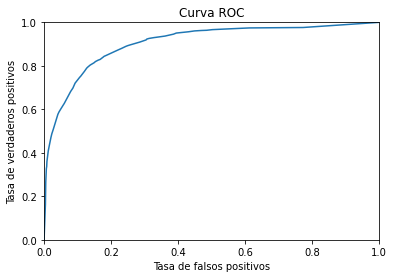

In [93]:
#grafica auc_roc

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show() 

### Bosque aleatorio

In [94]:
best_model_forest_up = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_random_forest_upsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_random_forest_upsample.fit(features_upsampled, target_upsampled)
        predictions_valid = model_random_forest_upsample.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model_forest_up = model_random_forest_upsample
            best_result = result
            best_est = est
            best_depth = depth

           
probabilities_valid_1 = model_random_forest_upsample.predict_proba(features_valid)
probabilities_one_valid_1 = probabilities_valid_1[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)        

print("umbral de exactitud del mejor modelo en el conjunto de validación", best_result, "n_estimators:", best_est, "best_depth:", depth)

0.9056526302058628
umbral de exactitud del mejor modelo en el conjunto de validación 0.8075076385857703 n_estimators: 50 best_depth: 10


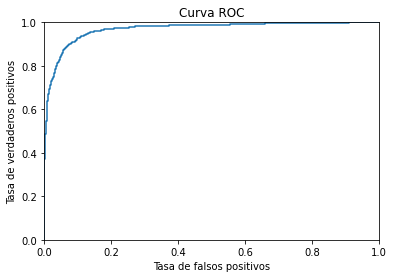

In [95]:
#grafica auc_roc

fpr_1, tpr_1, thresholds_1 = roc_curve(target_valid, probabilities_one_valid_1)

plt.figure()
plt.plot(fpr_1, tpr_1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

### Regresion logistica

In [96]:
model_regresion_upsample = LogisticRegression(random_state=54321, solver='liblinear') # inicializa el constructor de modelos

model_regresion_upsample.fit(features_upsampled, target_upsampled) # entrena el modelo en el conjunto de entrenamiento

predictions_valid = model_regresion_upsample.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación

result = f1_score(target_valid, predictions_valid)

probabilities_valid_2 = model_regresion_upsample.predict_proba(features_valid)
probabilities_one_valid_2 = probabilities_valid_2[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)        

print( "el umbral de exactitud del modelo de regresión logistica en el conjunto de validación:", result)

0.9056526302058628
el umbral de exactitud del modelo de regresión logistica en el conjunto de validación: 0.44967482192629293


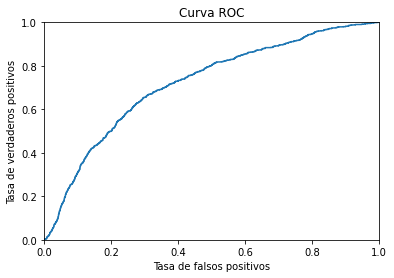

In [97]:
#grafica auc_roc

fpr_2, tpr_2, thresholds_2 = roc_curve(target_valid, probabilities_one_valid_2)

plt.figure()
plt.plot(fpr_2, tpr_2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

## Submuestreo

In [98]:
#Funcion de submuestreo

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [99]:
#Definimos las nuevas variables

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.27)

In [100]:
#verificamos la cantidad de respuestas positivas y negativas para ajustar el submuestreo de forma mas equilibrada
print((target_downsampled == 1).sum())
print((target_downsampled == 0).sum())

844
852


### Arbol de decision

In [101]:
best_model_tree_do = None
best_result = 0
best_depth = 0
for depth in range(1, 10): # selecciona el rango del hiperparámetro
    model_tree_downsample = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    # entrena el modelo en el conjunto de entrenamiento con sobremuestreo
    model_tree_downsample.fit(features_downsampled, target_downsampled) 
    # entrena el modelo en el conjunto de entrenamiento
    predictions_valid = model_tree_downsample.predict(features_valid)
    # obtén las predicciones del modelo en el conjunto de validación
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model_tree_do = model_tree_downsample
        best_result = result
        best_depth = depth


probabilities_valid = model_tree_downsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)        

print(f"El umbral de exactitud del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

0.862973794785441
El umbral de exactitud del mejor modelo en el conjunto de validación (max_depth = 9): 0.6119942196531791


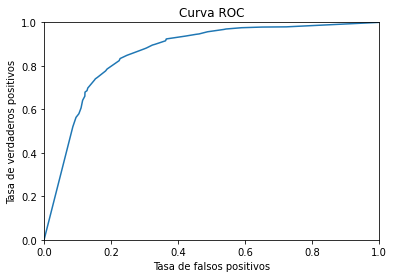

In [102]:
#grafica auc_roc

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show() 

### Bosque aleatorio

In [103]:
best_model_forest_do = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_random_forest_downsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_random_forest_downsample.fit(features_downsampled, target_downsampled)
        predictions_valid = model_random_forest_downsample.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model_forest_do = model_random_forest_downsample
            best_result = result
            best_est = est
            best_depth = depth

           
probabilities_valid_1 = model_random_forest_downsample.predict_proba(features_valid)
probabilities_one_valid_1 = probabilities_valid_1[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)        

print("umbral de exactitud del mejor modelo en el conjunto de validación", best_result, "n_estimators:", best_est, "best_depth:", depth)

0.862973794785441
umbral de exactitud del mejor modelo en el conjunto de validación 0.7205206738131701 n_estimators: 50 best_depth: 10


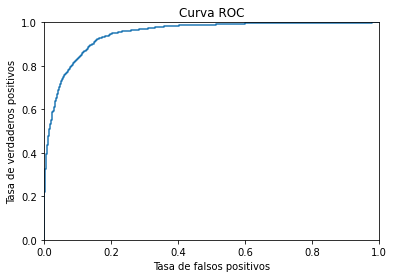

In [104]:
#grafica auc_roc

fpr_1, tpr_1, thresholds_1 = roc_curve(target_valid, probabilities_one_valid_1)

plt.figure()
plt.plot(fpr_1, tpr_1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

### Regresion logistica

In [105]:
model_regresion_downsample = LogisticRegression(random_state=54321, solver='liblinear') # inicializa el constructor de modelos

model_regresion_downsample.fit(features_downsampled, target_downsampled) # entrena el modelo en el conjunto de entrenamiento

predictions_valid = model_regresion_downsample.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación

result = f1_score(target_valid, predictions_valid)

probabilities_valid_2 = model_regresion_downsample.predict_proba(features_valid)
probabilities_one_valid_2 = probabilities_valid_2[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)        

print( "el umbral de exactitud del modelo de regresión logistica en el conjunto de validación:", result)

0.862973794785441
el umbral de exactitud del modelo de regresión logistica en el conjunto de validación: 0.4503267973856209


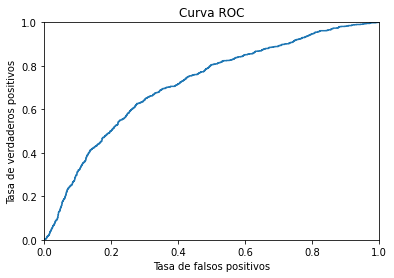

In [106]:
#grafica auc_roc

fpr_2, tpr_2, thresholds_2 = roc_curve(target_valid, probabilities_one_valid_2)

plt.figure()
plt.plot(fpr_2, tpr_2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

# Pruebas de calidad a los modelos

In [107]:
pred1 = best_model_tree.predict(features_test)
pred2 = best_model_forest.predict(features_test)
pred3 = model_regresion.predict(features_test)
pred4 = best_model_tree_up.predict(features_test)
pred5 = best_model_forest_up.predict(features_test)
pred6 = best_model_tree_do.predict(features_test)
pred7 = best_model_forest_do.predict(features_test)
pred8 = model_regresion_upsample.predict(features_test)
pred9 = model_regresion_downsample.predict(features_test)

In [108]:
for pred in [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9]:
    print(f1_score(pred,target_test))

0.5334081976417744
0.5561833019460138
0.08141592920353982
0.5221870047543582
0.6042590949423248
0.5174272367948257
0.5819861431870669
0.43440860215053767
0.4324853228962817


## Conclusion sobre la prueba de calidad


Hemos aplicado la prueba de calidad a los nueve modelos que entrenamos previamente y hemos descubierto que solo uno de ellos pasa la prueba f1 que se nos ha pedido para el proyecto, que seria el pred5(best_model_forest_up).



## Prueba de cordura

In [109]:
predictions_cord = pd.Series(target_test.max(), index=target_test.index)

In [110]:
print(predictions_cord.head(5))

7867    1
1402    1
8606    1
8885    1
6494    1
dtype: int64


In [111]:
#Mejor modelo
predictions_test = best_model_forest_up.predict(features_test)
result = f1_score(target_test, predictions_cord)
result2 = f1_score(target_test, predictions_test)
print(result, result2)

0.3391463212091015 0.6042590949423248


In [112]:
#Aca hacemos la prueba de cordura y verificamos si nuestro modelo supera la calidad de este.
result = f1_score(target_test, predictions_cord)
print(result)

0.3391463212091015


# Conclusion

Al final de todas las evaluaciones que hemos realizado pudimos ver que l unico modelo apto para cumplir con los requerimientos en esta oportunidad es el de bosque aleatorio de la seccion de sobremuestreo.

Hemos entrenado nuestro modelo y lo hemos probado en calidad y cordura y ha superado ambas pruebas exitosamente, ahora esta listo para ser utilizado.